In [1]:
import pandas as pd
import statistics
from sys import argv
import matplotlib.pyplot as plt

def diff_list(l): # durations as opposed to cumulative raw timestamps
    dl = list()
    prev = l[0]
    for item in l[1:]:
        dl.append(item-prev)
        prev = item
    return dl

df = pd.read_csv('jolteon-samples.csv')
print('read the csv')

header = list(df.head())
del header[-1] # remove timestamp
timestamps = df['timestamp']

results_dfs = dict()

for powerDomain in header:
	energies = df[powerDomain]
	lastDifferent = energies[0]
	ts_diffs = [ timestamps[0] ] # timestamps where there was an energy update
	for i in range(len(energies)):
		if energies[i] != lastDifferent:
			ts_diffs.append(timestamps[i])
			lastDifferent = energies[i]

	ts_diffs = diff_list(ts_diffs) # get durations instead of raw timestamps

	outliers = list(); filtered = list()

	# removing outliers. im defining outliers as ones longer than 5,000 usecs
	for tsd in ts_diffs:
		if (tsd > 5000):
			outliers.append(tsd)
		else:
			filtered.append(tsd)

	result = filtered
    
	results_dfs[powerDomain] = pd.DataFrame(result,columns=[powerDomain])
    
	print(f'collected result dataframe for {powerDomain}. len(outliers)={len(outliers)},len(result)={len(result)}')
    
print('all results stored in \'results_dfs\', currently a dictionary')

read the csv
collected result dataframe for dram. len(outliers)=100,len(result)=28266
collected result dataframe for core. len(outliers)=0,len(result)=0
collected result dataframe for pkg. len(outliers)=10,len(result)=49688
collected result dataframe for dram.1. len(outliers)=10,len(result)=49229
collected result dataframe for core.1. len(outliers)=0,len(result)=0
collected result dataframe for pkg.1. len(outliers)=10,len(result)=49689
all results stored in 'results_dfs', currently a dictionary


error plotting results_dfs[core]
error plotting results_dfs[core.1]


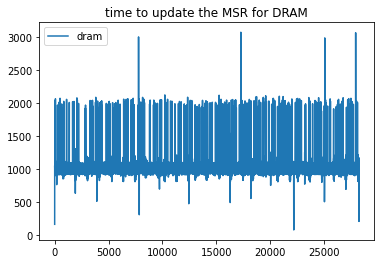

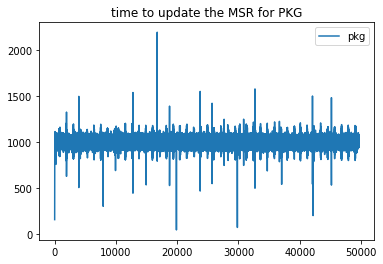

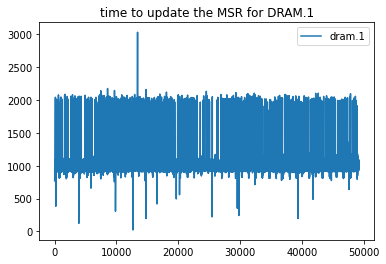

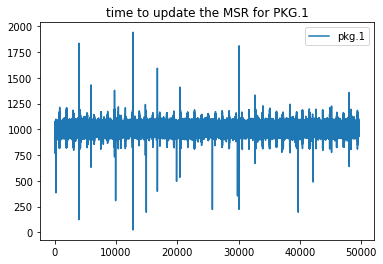

In [18]:
for key in results_dfs.keys():
    try:
        plot = results_dfs[key].plot()
        plot.set_title(f'time to update the MSR for {key.upper()}')
        plot.get_figure().savefig(f'{key}_msr-update-time.png')
        # plot.get_figure().clf()
        with open(key+'_summary-statistics.tex','w') as fh: fh.write(results_dfs[key].describe().to_latex())
    except:
        print(f"error plotting results_dfs[{key}]")

<AxesSubplot:>

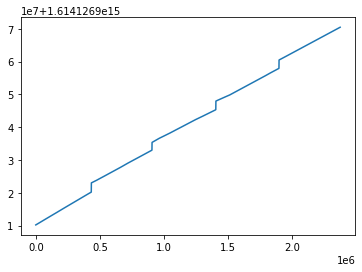

In [9]:
timestamps.plot()